<a href="https://colab.research.google.com/github/gg5d/Diffusion_models/blob/main/Schrodinger_Bridges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

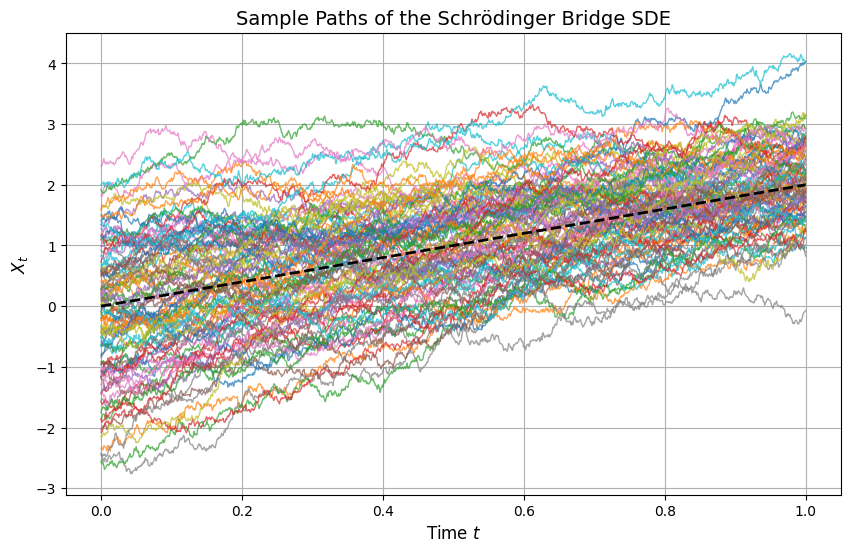

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define time grid
T = 1.0
N = 1000
dt = T / N
t_vals = np.linspace(0, T, N)

# Mean path and its derivative
def m_t(t):
    return 2 * t

def dm_t(t):
    return 2

# Drift coefficient A(t)
def A(t):
    return -(2 + 2*t + t**2) / (2 * (1 + t))

# Drift function μ(t, x)
def mu(t, x):
    return A(t) * (x - m_t(t)) + dm_t(t)

# Euler-Maruyama simulation
def simulate_sde(num_paths=5):
    X = np.zeros((num_paths, N))
    # Initial condition: X_0 ~ N(0, 1)
    X[:, 0] = np.random.randn(num_paths)

    for i in range(N - 1):
        t = t_vals[i]
        dW = np.random.randn(num_paths) * np.sqrt(dt)
        X[:, i+1] = X[:, i] + mu(t, X[:, i]) * dt + dW

    return X

# Run simulation
num_paths = 100
X_simulated = simulate_sde(num_paths)

# Plotting
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(t_vals, X_simulated[i, :], lw=1, alpha=0.7, label=f'Path {i+1}')

# Also plot the mean path
plt.plot(t_vals, m_t(t_vals), 'k--', lw=2, label='Mean Path $m_t = 2t$')
plt.xlabel('Time $t$', fontsize=12)
plt.ylabel('$X_t$', fontsize=12)
plt.title('Sample Paths of the Schrödinger Bridge SDE', fontsize=14)
#plt.legend()
plt.grid(True)
plt.show()